In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_methodology.pdf
/kaggle/input/kaggle-survey-2020/supplementary_data/kaggle_survey_2020_answer_choices.pdf


There are many paths and ways to enter the Data Science filed. Those many ways and experts opinions overwhelm students that want to start their career as Data Scientists. The best way to to understand how a field develops is to look at the trends in the field using a large dataset with different paths and check the patterns in there.

# Data Exploration (EDA)

In [2]:
data = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [105]:
data.shape

(20037, 355)

In [103]:
data.isna().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

It seems that the questions at the end of the survey are mostly Nulls, maybe because of the length of the survey. I will handle the null values with each question instead of handling them in advance in order not to lose too much data befre deciding on which question to be used.

# What are top used Languages by Data Scientists?

In [106]:
def plot_legends(ax, title, x_label, x_shift = 0.09, hei = 20):
    """Sets titles and removes unnecessary parts of the graph to maintain the data to ink ratio
    Args:
        ax: The axis instance to be plotted
        x_label: the label of the x axis
        x_shift: the amount by which the bar or line marker is shifted in x axis
        hei: the amount by which the bar or line marker is shifted in the y axis
    """
    # Add title and remove borders
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_yticks([])
    ax.spines[:].set_visible(False)

    # Adding text annotations at the upper part of the bar or line marker
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() + x_shift, p.get_height() + hei))

Plotting the frequency of each programming language used by Data Scientists to check what is the most used languages in the field.

In [107]:
data_scientists = data.query("Q5 == 'Data Scientist'")
lang_cols = [x for x in list(data_scientists.columns) if 'Q7' in x]
lang_freq = pd.Series([data_scientists[x].count() for x in lang_cols[:-2]])
lang_freq.index = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB']

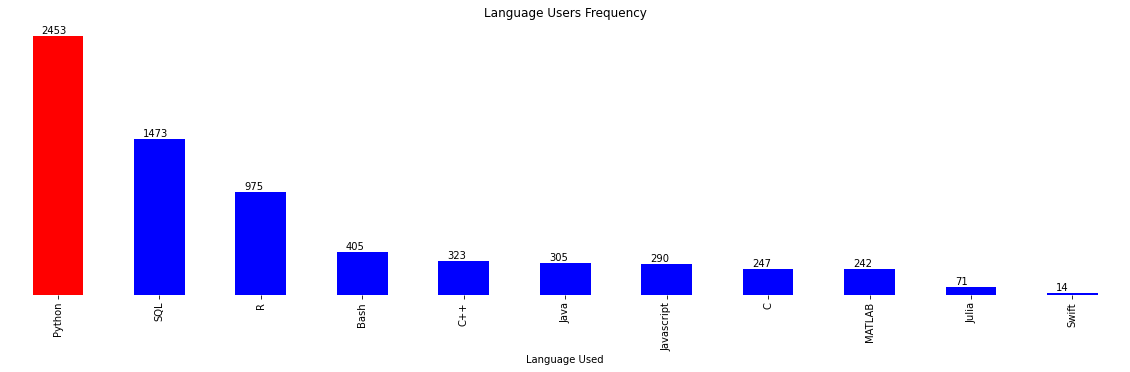

In [108]:
ax = lang_freq.sort_values(ascending = False).plot(kind = 'bar', 
                                                   color = ['r'] + ['b' for i in range(len(lang_freq) -1)],
                                                   xlabel = list(lang_freq.index), figsize = (20,5) )

plot_legends(ax, 'Language Users Frequency', "Language Used")

# What is the top used languages for Data Scientists with highest salaries?

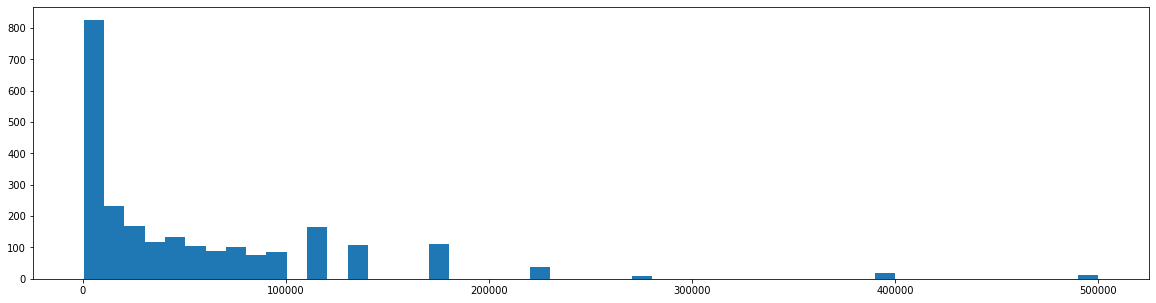

In [110]:
# Removing nonnumerical characters from the Salary field and splitting ranges to take the average

def remove_chars(chars):
    """Removing unwanted characters from the the Salary column
    Args:
        chars: the list of characters to be removed
    """
    for char in chars:
        data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.replace(char, '') if type(i) == str else i)

remove_chars(['$', '>', '<'])
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: i.split("-") if type(i) == str else i)
data_scientists.loc[:, 'Q24'] = data_scientists.Q24.apply(lambda i: np.mean([float(x.replace(",", "")) for x in i]) if type(i) == list else i)
data_scientists.loc[:, 'Q24'].hist(bins = 50, grid = False, figsize = (20, 5));

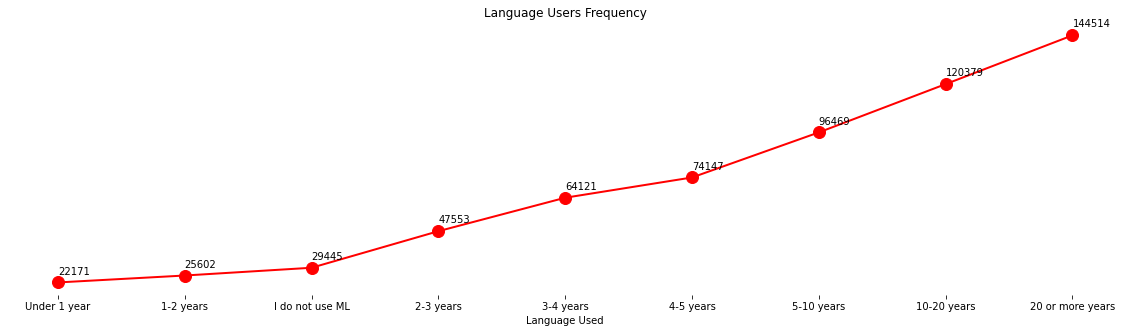

In [78]:
tmp_experience = data_scientists[['Q15','Q24']].groupby('Q15').mean().sort_values(by = 'Q24')
tmp_experience.index = ['Under 1 year', '1-2 years', 'I do not use ML', '2-3 years', 
                        '3-4 years', '4-5 years', '5-10 years', '10-20 years','20 or more years']

ax = tmp_experience.plot(kind = 'line', figsize = (20,5),color = ['r'] + ['b' for i in range(len(tmp_experience) )], legend = False, marker='o',
    linewidth=2, markersize=12)    
    
plot_legends(ax, 'Language Users Frequency', "Language Used")

for i,j in zip([x for x in range(len(tmp_experience.index))],tmp_experience.Q24):
    ax.annotate(str(round(j)),xy=(i,j + 4e3))

# Is there an association between salaries and the programming Languages used?

In [79]:
salary_lang_df = data_scientists[lang_cols[:-2] + ['Q24']]
salary_lang_df.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'Salary']

for col in salary_lang_df[:-1]:
    salary_lang_df.loc[salary_lang_df[col] == col, col] = 1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


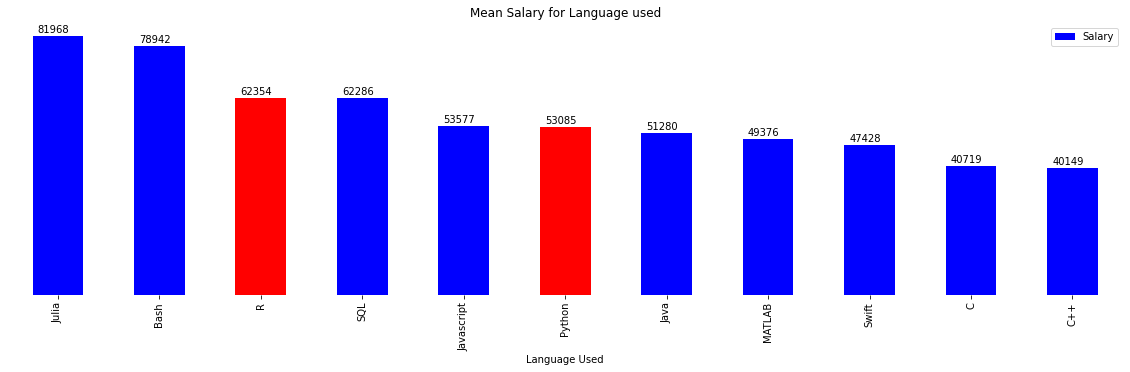

In [93]:
import matplotlib.pyplot as plt

tmp =  pd.melt(salary_lang_df, id_vars=["Salary"], 
             value_vars=['Python', 'R', 'SQL', 'C', 'C++', 
                         'Java', 'Javascript', 'Julia', 
                         'Swift', 'Bash', 'MATLAB']).dropna(subset = ['value'], axis = 0).drop('value', axis = 1).groupby('variable').mean().sort_values(by = 'Salary',ascending = False)



tmp['variable'] = tmp.index

ax = tmp.plot(x = 'variable',
              y = 'Salary',
              kind = 'bar', 
              figsize = (20,5),
              color = ['b', 'b', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b'])


plot_legends(ax, 'Mean Salary for Language used', "Language Used", 0.05, 1000)

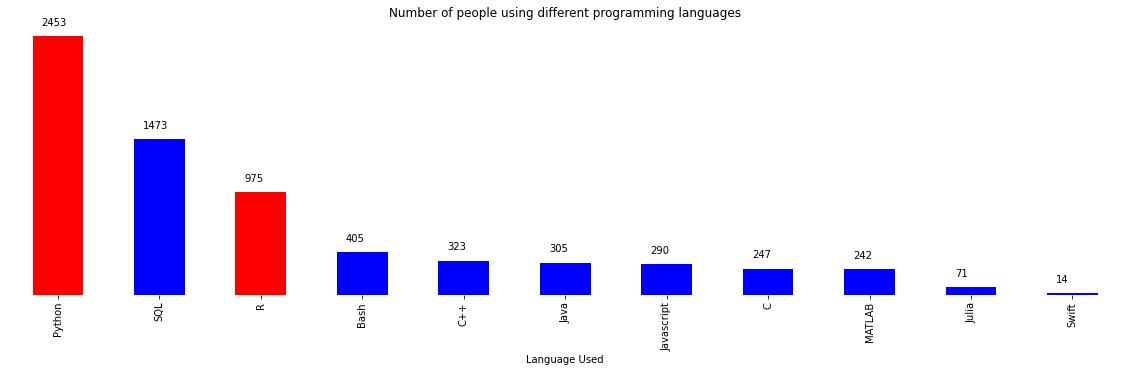

In [95]:
tmp = pd.melt(salary_lang_df, id_vars=["Salary"], 
              value_vars=['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash'
                          , 'MATLAB']).dropna(subset = ['value'], axis = 0).drop('value', axis = 1).variable.value_counts()

ax = tmp.plot(kind = 'bar', 
              figsize = (20,5),
              color = ['r', 'b', 'r', 'b', 'b', 'blue', 'b', 'b', 'b', 'b', 'b'])
    
plot_legends(ax, 'Number of people using different programming languages', "Language Used", 0.09, 100)

In [98]:
data_scientists
course_cols = [x for x in list(data_scientists.columns) if 'Q37' in x]
salary_course_df = data_scientists[course_cols[:-2] + ['Q24']]
salary_course_df.columns = ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", "Cloud-certification programs (direct from AWS, Azure, GCP, or similar)", "University Courses (resulting in a university degree)", "Salary"]


for col in salary_course_df[:-1]:
    salary_course_df.loc[salary_course_df[col] == col, col] = 1
    
# Updating the list of names
salary_course_df.columns = ["Coursera", "edX", "Kaggle Learn Courses", 
                            "DataCamp", "Fast.ai", "Udacity", "Udemy", 
                            "LinkedIn Learning", "Cloud-certification", 
                            "University Courses", "Salary"]

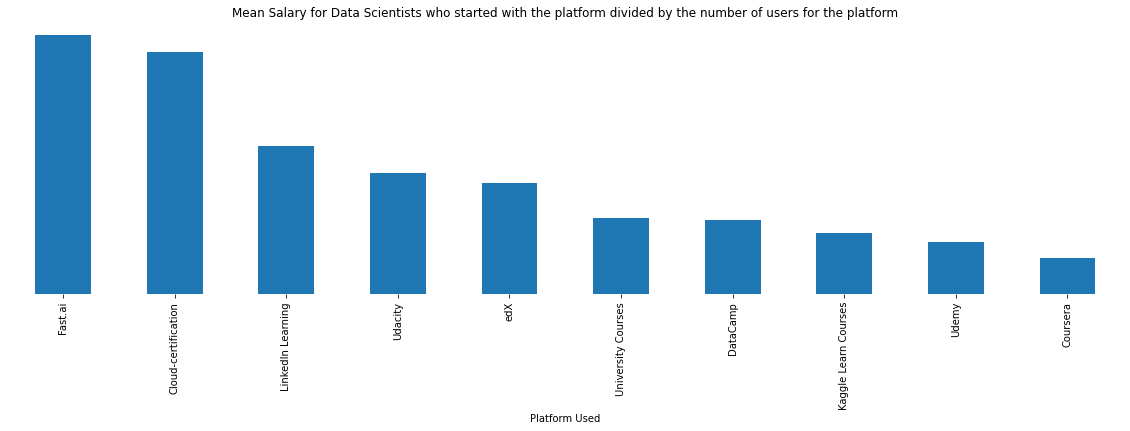

In [88]:
val = pd.melt(salary_course_df, id_vars=["Salary"], value_vars= ["Coursera", "edX", "Kaggle Learn Courses", "DataCamp", "Fast.ai", "Udacity", "Udemy", "LinkedIn Learning", "Cloud-certification", "University Courses"]).dropna(subset = ['value'], axis = 0).drop('value', axis = 1)
val2 = val.groupby('variable')
val2 = val2.Salary.mean()/ val.variable.value_counts()[list(val2.Salary.mean().index)]
ax =  val2.sort_values(ascending = False).plot(figsize = (20, 5), kind = 'bar')
    
plot_legends(ax, 'Mean Salary for Data Scientists who started with the platform divided by the number of users for the platform', "Platform Used", 0.05, 1000)

In [89]:
data_scientists[data_scientists.Q7_Part_8.notna()].Q4.value_counts()

Master’s degree                                                      33
Doctoral degree                                                      21
Bachelor’s degree                                                     9
Professional degree                                                   4
Some college/university study without earning a bachelor’s degree     3
I prefer not to answer                                                1
Name: Q4, dtype: int64

In [90]:
data_scientists[data_scientists.Q7_Part_8.notna()].Q15.value_counts()

5-10 years          17
4-5 years           11
3-4 years            9
2-3 years            9
Under 1 year         8
1-2 years            6
10-20 years          5
20 or more years     2
Name: Q15, dtype: int64

In [112]:
print('The number of people that uses Julia = {}'.format(salary_lang_df.query("Julia == 1").shape[0]))

The number of people that uses Julia = 71


In [114]:
print('The number of people that uses Julia & Python" = {}'.format(salary_lang_df.query("Julia == 1 & Python == 1").shape[0]))

The number of people that uses Julia & Python" = 65


## Results
Although it seems that people who uses Julia earn more than people who uses other languages like Python, but with further investigation I found that 95% of the people who use Julia also use Python

Also it was noted that 33 of the 71 people who has knowledge with Julia has Master's degree and and 21 had Phd, which shows why their salary is higher in average compared to other data scientists.

There are many variables that needs to be investigated to reach a better understanding.